# Job Demand and Job Pay of each SEA countries

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create a list of SEA countries
SEA_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore','Brunei', 'West Timor']

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Which country in the SEA region has the highest demand of Data Analyst positions as well as offer the top pays for Data Analysts ?

1. Find the percentage of job postings in each country at the SEA region

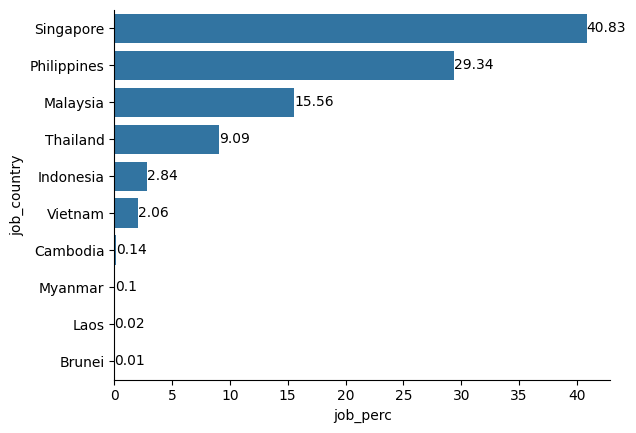

In [61]:
df_DA_SEA = df[
    (df['job_title_short'] == "Data Analyst") &
    (df['job_country'].isin(SEA_countries))
    ].copy()


df_DA_SEA_demand = df_DA_SEA['job_country'].value_counts().sort_values(ascending=False)

df_DA_SEA_demand = df_DA_SEA_demand.reset_index(name= 'job_count')

total_job_count = df_DA_SEA_demand['job_count'].sum()

df_DA_SEA_demand['job_perc'] = 100 * df_DA_SEA_demand['job_count'] / total_job_count
df_DA_SEA_demand['job_perc'] = df_DA_SEA_demand['job_perc'].apply(lambda x: float(f'{x: .2f}'))

df_DA_SEA_demand

sns.barplot(
    data = df_DA_SEA_demand,
    x= 'job_perc',
    y= 'job_country'
    )
sns.despine()


for i, num in enumerate(df_DA_SEA_demand['job_perc']):
    plt.text(x= num, y = i + 0.1, s= num)

2. Find the median annual salary of SEA countries

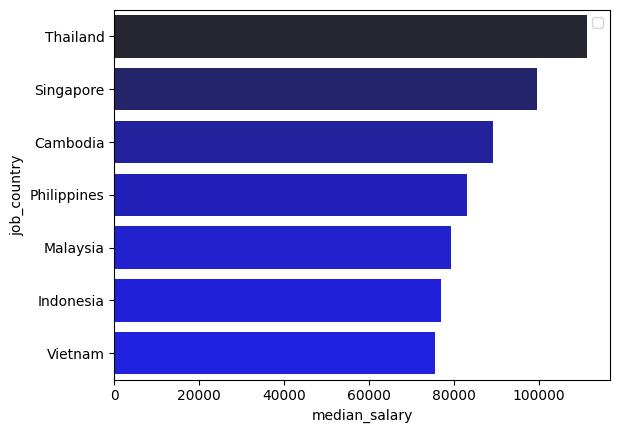

In [53]:
df_DA_SEA2 = df_DA_SEA.dropna(subset='salary_year_avg')
df_DA_SEA_pay = df_DA_SEA2.groupby('job_country')['salary_year_avg'].median().sort_values(ascending=True)

df_DA_SEA_pay = df_DA_SEA_pay.reset_index(name= 'median_salary')

sns.barplot(
    data= df_DA_SEA_pay,
    x= 'median_salary',
    y= 'job_country',
    hue= 'median_salary',
    palette= 'dark:b_r'
)

plt.legend('')
plt.gca().invert_yaxis()


3. Combine 2 bar charts into one plot

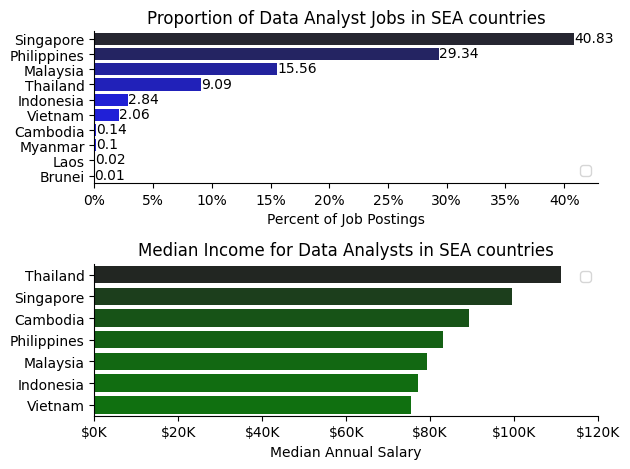

In [88]:
fig, ax = plt.subplots(2,1)

# Create the job demand plot
sns.barplot(
    data = df_DA_SEA_demand,
    x='job_perc',
    y='job_country',
    ax = ax[0],
    hue = 'job_perc',
    palette= 'dark:b_r'
)
# Format the axes and add data labels
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'{int(x)}%'))
for i, num in enumerate(df_DA_SEA_demand['job_perc']):
    ax[0].text(x= num, y = i + 0.2, s= num)
ax[0].set_xlabel('Percent of Job Postings')
ax[0].set_ylabel('')
ax[0].set_title('Proportion of Data Analyst Jobs in SEA countries')

# Create the salary plot
sns.barplot(
    data= df_DA_SEA_pay,
    x= 'median_salary',
    y='job_country',
    ax= ax[1],
    hue = 'median_salary',
    palette= 'dark:g_r'
)
# Format the axes
ax[1].invert_yaxis()
ax[1].legend('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].set_xlim(0,120000)
ax[1].set_xlabel('Median Annual Salary')
ax[1].set_ylabel('')
ax[1].set_title('Median Income for Data Analysts in SEA countries')

# Modify layout of the figure
sns.despine()
fig.tight_layout()